# Production version of python rad transfer code

In [10]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
from glob import glob
from scipy.interpolate import interp1d, interp2d
from scipy.ndimage.filters import gaussian_filter1d
from hapi import *
import pandas as pd

from matplotlib.font_manager import FontProperties
from scipy.interpolate import CubicSpline

%run simulate_radiances_utils.py
%run locations.py


font = {'weight' : 'bold',
        'size'   : 12}
label_fontdict = {'weight' : 'bold',
        'size'   : 12}
title_fontdict = {'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

In [3]:
reanlaysis_vars_subset = ['PS','PL','QV','T', 'DELP']

In [4]:
loc_label = 'summit'


In [5]:
save_figs_rel_dir = '/home/cchristo/proj_christian/rad_transfer_python/figs/'

In [6]:
input_cs_matrix_rel_path = '/export/data2/groupMembers/cchristo/cs_matrices/' + loc_label + '/'
reanalysis_dir = '/export/data2/groupMembers/cchristo/reanalysis_3d/merra2/2015/'
file_type = '*.nc'
profile_ts_file_path = "/net/fluo/data2/groupMembers/cchristo/profiles/summit_merra/summit_all.nc"


all_file_paths_cs_matrix = [y for x in os.walk(input_cs_matrix_rel_path) for y in glob(os.path.join(x[0], file_type))]
all_file_paths_reanalysis = [y for x in os.walk(reanalysis_dir) for y in glob(os.path.join(x[0], '*.nc4'))]

In [7]:
dss = xr.open_dataset(profile_ts_file_path)

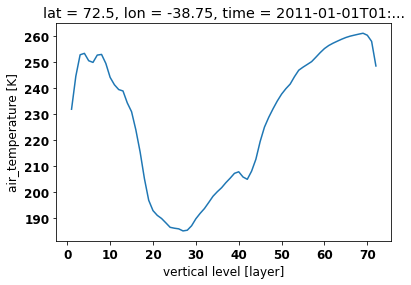

In [9]:
dss.isel(time = 0)['T'].plot()

# Open reanlysis data

In [72]:


ds_3d = xr.open_mfdataset(all_file_paths_reanalysis, 
                          combine='by_coords')[reanlaysis_vars_subset]

OSError: no files to open

In [8]:
# ds_3d.isel(time = 56)
# ds_3d_seasonal = ds_3d.groupby('time.season').mean()

In [10]:
loc_lat =  loc_lat_lon_map[loc_label][0] #72.5796
loc_lon = loc_lat_lon_map[loc_label][1] #-38.4588
time_ii = 63

ds_single = ds_3d.sel(lat = loc_lat, lon = loc_lon, method = 'nearest')
# select single time
# ds_single = ds_single.isel(time = time_ii)
# time_i = ds_single.time

# seasonal mea 
ds_seasonal = ds_single.groupby('time.season').mean('time')

ds_single.load()
p_prof, T_prof, dz_prof,  vmr_h2o_prof, VCD_dry_prof, rho_N_h2o_prof, rho_N_prof = compute_profile_properties_merra2(ds_single, verbose=False)

# print(time_i)

In [29]:
# ds_single.

In [11]:
%%time
ds_seasonal.load()
# ds_single

CPU times: user 59min 43s, sys: 22min 10s, total: 1h 21min 54s
Wall time: 58min 20s


<xarray.Dataset>
Dimensions:  (lev: 72, season: 4)
Coordinates:
    lat      float64 72.5
    lon      float64 -38.75
  * lev      (lev) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 68.0 69.0 70.0 71.0 72.0
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    PS       (season) float32 65355.156 68489.52 66452.37 66753.266
    PL       (season, lev) float32 1.5000001 2.6350012 ... 65361.734 66253.375
    QV       (season, lev) float32 8.522528e-07 1.1577021e-06 ... 0.0005986495
    T        (season, lev) float32 220.03014 227.4993 ... 250.9972 245.7745
    DELP     (season, lev) float32 1.0000001 1.2700003 ... 783.6921 999.6958

In [16]:
season_i = 0
ds_seasonal.isel(season = season_i)
p_prof, T_prof, dz_prof,  vmr_h2o_prof, VCD_dry_prof, rho_N_h2o_prof, rho_N_prof = compute_profile_properties_merra2(ds_seasonal.isel(season = season_i), verbose=False)



In [14]:
# save seasonal profile
# ds_seasonal.isel(season = season_i).to_netcdf('/export/data2/groupMembers/cchristo/cs_matrices/summit_seasonal/profile_djf_week.nc')

In [14]:
for seas_i in ds_seasonal.season:
    plot_ds = ds_seasonal.sel(season = seas_i)
    p_prof, T_prof = plot_ds['PL'].values, plot_ds['T'].values
    plot_profile(p_prof, T_prof, min_pres=1e4, label=seas_i.values,
                 newfig_bool = False)
    plt.legend()

NameError: name 'ds_seasonal' is not defined

In [15]:
# def interpolate_profile(p_prof, 
#                         var_prof, 
#                         p_interp_grid, 
#                         method = 'CubicSpline',
#                         return_interp_obj = False):
#     '''
#     Interpolate profile to given pressure grid. 
    
#     Args
#     -----
#     p_prof - np.array
#         pressure profile 
#     var_prof - np.array
#         profile of variable to interpolate
#     method - str {'CubicSpline',}
#         interpolation method to use
        
#     return_interp_obj - bool
#         if True, return scipy.interpolate object along with profile
        
        
#     Returns
#     -------
#     (p_interp_grid, var_prof_interpolated) - Profile interpolated to p_interp_grid
    
#     '''
    
#     if method == 'CubicSpline':
#         spline_obj = CubicSpline(p_prof, var_prof)
#         var_prof_interpolated = spline_obj(p_interp_grid)
        
#     if return_interp_obj:
#         return (p_interp_grid, var_prof_interpolated, spline_obj)
#     else:
#         return (p_interp_grid, var_prof_interpolated)

In [16]:
p_interp_grid = np.linspace(1e3, p_prof.max(), 300)
# p_interp_grid = np.logspace(1e3, p_prof.max(), 200)
res = interpolate_profile(p_prof, T_prof, p_interp_grid)

NameError: name 'np' is not defined

In [17]:
# res[1]
# plt.plot(p_interp_grid , '.')
# p_interp_grid

In [18]:
# p_interp_grid
# plot_profile(*res , min_pres = 6e3)

# Open saved cross sections

In [7]:
input_cs_matrix_path_format = input_cs_matrix_rel_path + '{year}/{month:02d}/cs_matrix_{year}{month:02d}{day:02d}_{hour:02d}{minute:02d}.nc'
input_cs_matrix_path = input_cs_matrix_path_format.format(year = time_i['time.year'].item(), 
                                                             month = time_i['time.month'].item(), 
                                                             day = time_i['time.day'].item(),
                                                             hour = time_i['time.hour'].item(), 
                                                             minute = time_i['time.minute'].item())
cs_matrix_ds = xr.open_dataset(input_cs_matrix_path)

# cs_matrix_ds = xr.open_mfdataset(all_file_paths_cs_matrix, combine = 'by_coords')
# cs_matrix_ds = cs_matrix_ds.sel(time = time_i)



NameError: name 'time_i' is not defined

# Create new cross section matrix

In [17]:
%%capture
xmin = 400
# Maximum wavenumber
xmax = 2100
# Actually downloading the data 
# (we have to know the HITRAN molecule numbers, given in http://hitran.org/docs/molec-meta/)
fetch('H2O_S',1,1,xmin,xmax)
fetch('CO2_S',2,1,xmin,xmax)
fetch('CH4_S',6,1,xmin,xmax)

# Let us hust get line position nu and line strength sw for the different molecules:
nu_H2O,sw_H2O = getColumns('H2O_S',['nu','sw'])
nu_CH4,sw_CH4 = getColumns('CH4_S',['nu','sw'])
nu_CO2,sw_CO2 = getColumns('CO2_S',['nu','sw'])


In [18]:
%%time
cs_matrix_ds = create_cross_section_matrix_hapi(p_prof, T_prof, 
                                     xmin, xmax, 
                                     time_i = ds_seasonal.isel(season = season_i)['season'],
                                     output_path=None)

CPU times: user 44min 44s, sys: 16.2 s, total: 45min
Wall time: 44min 59s


In [20]:
# cs_matrix_ds

In [22]:
# cs_matrix_ds.to_netcdf('/export/data2/groupMembers/cchristo/cs_matrices/summit_seasonal/cs_matrix_djf_week.nc')
# !ls
# cs_matrix_ds = xr.open_dataset('/net/fluo/data2/groupMembers/cchristo/cs_matrices/summit_seasonal/cs_matrix_djf_week.nc')
# cs_matrix_ds_julia = xr.open_dataset('/net/fluo/data2/groupMembers/cchristo/cs_matrices/summit_seasonal/cs_matrix_djf_week_julia.nc')

In [41]:
# cs_matrix_co2_julia = cs_matrix_ds_julia['cs_matrix_co2'].values
# cs_matrix_ch4_julia = cs_matrix_ds_julia['cs_matrix_ch4'].values
# cs_matrix_h2o_julia = cs_matrix_ds_julia['cs_matrix_h2o'].values

In [27]:

cs_matrix_co2 = cs_matrix_ds['cs_matrix_co2'].values
cs_matrix_ch4 = cs_matrix_ds['cs_matrix_ch4'].values
cs_matrix_h2o = cs_matrix_ds['cs_matrix_h2o'].values

nu_ = cs_matrix_ds['nu'].values
NLEV = len(cs_matrix_ds['pressure'])

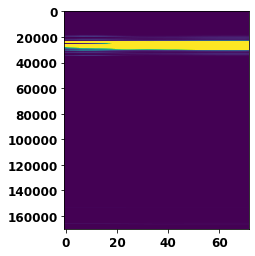

In [25]:
# nu_ = np.append(nu_, 2100.0)

# plt.imshow(cs_matrix_co2_julia, vmax = 10**-20)
# plt.gca().set_aspect(0.0005)
plt.figure()
plt.imshow(cs_matrix_co2, vmax = 10**-20)
plt.gca().set_aspect(0.0005)
# 
# nu_.shape

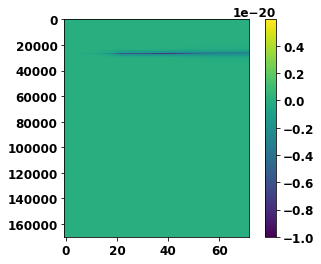

In [63]:
diff =  cs_matrix_co2 - cs_matrix_co2_julia 
plt.imshow(diff, vmin= -1e-20)
plt.gca().set_aspect(0.0005)
plt.colorbar()

# Compute pdf of downwelling radiation for each time 

In [28]:
Rdown, T = compute_downwelling_radiation(cs_matrix_co2, 
                                         cs_matrix_h2o, 
                                         cs_matrix_ch4, 
                                         T_prof,
                                         VCD_dry_prof, 
                                         vmr_h2o_prof,
                                         nu_)

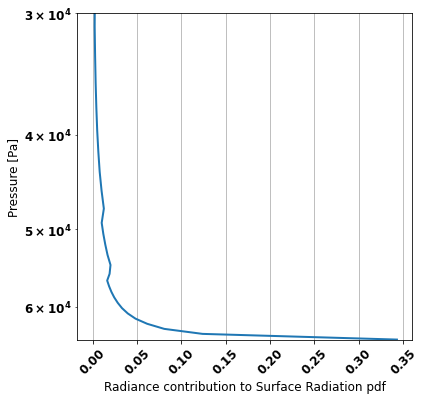

In [29]:
Rdown_pdf =  Rdown.sum(axis =0)
Rdown_pdf = Rdown_pdf/Rdown_pdf.sum()
plot_profile(p_prof, Rdown_pdf, min_pres = 3e4, 
             xlabel = 'Radiance contribution to Surface Radiation pdf',
             rotation = 45)

In [27]:
# for time_ii in range(8):
for time_ii in range(57, 57 + 8):
    ds_single = ds_3d.sel(lat = loc_lat, lon = loc_lon, method = 'nearest')
    ds_single = ds_single.isel(time = time_ii)
    time_i = ds_single.time
    ds_single.load()
    p_prof, T_prof, dz_prof,  vmr_h2o_prof, VCD_dry_prof, rho_N_h2o_prof, rho_N_prof = compute_profile_properties_merra2(ds_single, verbose=False)
    ts = pd.to_datetime(str(time_i.values)) 
    d = ts.strftime('%H:%M')
    #######
    input_cs_matrix_path = input_cs_matrix_path_format.format(year = time_i['time.year'].item(), 
                                                             month = time_i['time.month'].item(), 
                                                             day = time_i['time.day'].item(),
                                                             hour = time_i['time.hour'].item(), 
                                                             minute = time_i['time.minute'].item())
    cs_matrix_ds = xr.open_dataset(input_cs_matrix_path)
    
    cs_matrix_co2 = cs_matrix_ds['cs_matrix_co2'].values
    cs_matrix_ch4 = cs_matrix_ds['cs_matrix_ch4'].values
    cs_matrix_h2o = cs_matrix_ds['cs_matrix_h2o'].values

    nu_ = cs_matrix_ds['nu']
    NLEV = len(cs_matrix_ds['pressure'])
    #########
    Rdown, T = compute_downwelling_radiation(cs_matrix_co2, 
                                         cs_matrix_h2o, 
                                         cs_matrix_ch4, 
                                         T_prof,
                                         VCD_dry_prof, 
                                         vmr_h2o_prof,
                                         nu_)
    
    Rdown_pdf =  Rdown.sum(axis =0)
    Rdown_pdf = Rdown_pdf/Rdown_pdf.sum()
    ax = plot_profile(p_prof, Rdown_pdf, 
                 newfig_bool = False, 
                 min_pres = 3e4, 
                 xlim = [1e-4, 1],
                 xlabel = 'Radiance contribution to Surface Radiation',
                 label = d)
    ax.set_xscale('log')
    ax.set_title('Summit Greenland Surface Radiation Contributions ' + ts.strftime('%d-%m-%y'))
plt.legend()
# plt.savefig(save_figs_rel_dir + 'surface_rad_contribution/' + 'summit_7_01.png', dpi = 300)

NameError: name 'ds_3d' is not defined

<Figure size 432x288 with 0 Axes>

In [28]:
save_figs_rel_dir

'/home/cchristo/proj_christian/rad_transfer_python/figs/'

In [29]:
# for time_ii in range(8):
for time_ii in range(56, 56 + 8):
    ds_single = ds_3d.sel(lat = loc_lat, lon = loc_lon, method = 'nearest')
    ds_single = ds_single.isel(time = time_ii)
    time_i = ds_single.time
    ds_single.load()
    p_prof, T_prof, dz_prof,  vmr_h2o_prof, VCD_dry_prof, rho_N_h2o_prof, rho_N_prof = compute_profile_properties_merra2(ds_single, verbose=False)
    ts = pd.to_datetime(str(time_i.values)) 
    d = ts.strftime('%H:%M')
    ax = plot_profile(p_prof,  T_prof, # rho_N_h2o_prof,
                 newfig_bool = False, 
                 min_pres = 3e4, 
#                  min_pres = 5.5e4,
                 xlabel = 'Temperature',
                 label = d)
#     ax.set_title('Summit Greenland H2O Mixing Ratio ' + ts.strftime('%d-%m-%y'))
    ax.set_title('Summit Greenland Temperature ' + ts.strftime('%d-%m-%y'))
plt.legend()
plt.ylabel('Pressure [Pa]')
plt.xlim([240, 270])
# plt.savefig(save_figs_rel_dir + 'profiles/' + 'summit_temp_7_15.png', dpi = 300)
# plt.savefig(save_figs_rel_dir + 'profiles/' + 'summit_h2o_mixing_7_15.png', dpi = 300)

NameError: name 'ds_3d' is not defined

# Look at single profile

In [33]:
AMF = 1
# Compute transmission for each layer:
T = np.zeros((len(nu_),NLEV))
# Generate matrices of optical thickness per layer now for each gas: 
tau_co2 = cs_matrix_co2*VCD_dry_prof*400.e-6*AMF 
tau_co2_pre = cs_matrix_co2*VCD_dry_prof*270.e-6*AMF
#VCD_h2o = dz*rho_N_h2o
tau_h2o = cs_matrix_h2o*VCD_dry_prof*vmr_h2o_prof*AMF 
tau_ch4 = cs_matrix_ch4*VCD_dry_prof*1.8e-6*AMF 

## Compute Transmissions For Each Layer

In [34]:
T = np.exp(-tau_co2)*np.exp(-tau_h2o)*np.exp(-tau_ch4)
T_pre = np.exp(-tau_co2_pre)*np.exp(-tau_h2o)*np.exp(-tau_ch4)
TdCO2 = np.exp(-2*tau_co2)*np.exp(-tau_h2o)*np.exp(-tau_ch4)
TdH2O = np.exp(-tau_co2)*np.exp(-2*tau_h2o)*np.exp(-tau_ch4)
TdCH4 = np.exp(-tau_co2)*np.exp(-tau_h2o)*np.exp(-2*tau_ch4)

In [88]:
# VCD_dry_prof

## Generate Planck curve per layer

In [35]:
# Generate Planck curve per layer + surface:
wl_nu = 1.e7/nu_*1.e-9
wavenum_m = nu_*1e2
# Use skin temperature of 300K
# B_surf = planck(wl_nu,300)
# B = np.zeros((len(nu_),NLEV))
B = np.zeros(T.shape)
for i in range(NLEV):
#     B[:,i] = planck(wl_nu,T_prof[i])
    B[:,i] = planck_wavenumber(wavenum_m,T_prof[i])*1e2

# Calculate Downwelling Radiation

In [36]:
Rdown = np.zeros((len(nu_),NLEV))
Rdown_pre = np.zeros((len(nu_),NLEV))
# Rdown_dCO2 = np.zeros((len(nu_),NLEV))
# Rdown_dCH4 = np.zeros((len(nu_),NLEV))
# Rdown_dH2O = np.zeros((len(nu_),NLEV))

for i in range(NLEV):
    Rdown[:,i] = B[:,i]*(1-T[:,i])*np.prod(T[:,i+1:],axis=1)
    Rdown_pre[:,i] = B[:,i]*(1-T_pre[:,i])*np.prod(T_pre[:,i+1:],axis=1)
#     Rdown_dCO2[:,i] = B[:,i]*(1-TdCO2[:,i])*np.prod(TdCO2[:,i+1:],axis=1)
#     Rdown_dCH4[:,i] = B[:,i]*(1-TdCH4[:,i])*np.prod(TdCH4[:,i+1:],axis=1)
#     Rdown_dH2O[:,i] = B[:,i]*(1-TdH2O[:,i])*np.prod(TdH2O[:,i+1:],axis=1)

In [37]:
Surface_Down = np.sum(Rdown,axis=1)
Surface_Down_pre = np.sum(Rdown_pre,axis=1)
# Surface_Down_dH2O = np.sum(Rdown_dH2O,axis=1)

In [38]:
# W_mum_mW_cm = 10000/1000
W_m_mW_cm = 1e2*1e3
# W_mum_mW_cm = 1e-3

test


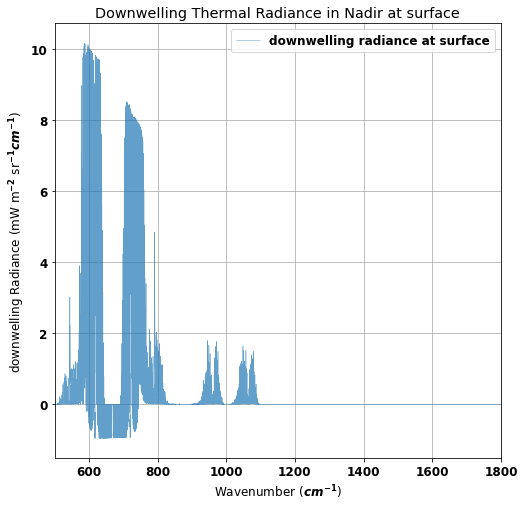

In [39]:
print('test')

plt.figure(figsize = (8,8))
plt.plot(nu_,1e3*(Surface_Down - Surface_Down_pre),label='downwelling radiance at surface', alpha=0.7 ,linewidth = 0.5)
# plt.plot(wl_nu*1e6,Surface_Down_dH2O,label='downwelling radiance at surface (double H$_2$O', alpha=0.7)#, wl_nu*1e6, np.sum(R,axis=1), wl_nu*1e6,R_surf)

plt.legend(loc=0)
# plt.xlabel('Wavelength ($\mu$m)')
plt.xlabel('Wavenumber ($cm^{-1}$)')
# plt.ylabel('downwelling Radiance (W m$^{-2}$ sr$^{-1}$ $\mu$m$^{-1}$)')
plt.ylabel(r'downwelling Radiance (mW m$^{-2}$ sr$^{-1} cm^{-1}$)')
plt.xlim((500,1800))
plt.title('Downwelling Thermal Radiance in Nadir at surface')
plt.grid()

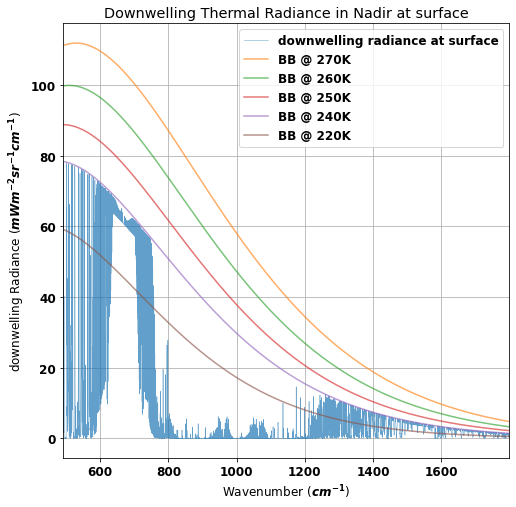

In [40]:
plt.figure(figsize = (8,8))
plt.plot(nu_, 1e3*Surface_Down,label='downwelling radiance at surface', alpha=0.7 ,linewidth = 0.5)
# plt.plot(wl_nu*1e6,Surface_Down_dH2O,label='downwelling radiance at surface (double H$_2$O', alpha=0.7)#, wl_nu*1e6, np.sum(R,axis=1), wl_nu*1e6,R_surf)

plt.plot(nu_, W_m_mW_cm*planck_wavenumber(wavenum_m,270),label='BB @ 270K',alpha=0.63)
plt.plot(nu_, W_m_mW_cm*planck_wavenumber(wavenum_m,260),label='BB @ 260K',alpha=0.63)
plt.plot(nu_, W_m_mW_cm*planck_wavenumber(wavenum_m,250),label='BB @ 250K',alpha=0.63)
plt.plot(nu_, W_m_mW_cm*planck_wavenumber(wavenum_m,240),label='BB @ 240K',alpha=0.63)
plt.plot(nu_, W_m_mW_cm*planck_wavenumber(wavenum_m,220),label='BB @ 220K',alpha=0.63)
plt.legend(loc=0)

plt.xlim((491,1799))
# plt.xlabel('Wavelength ($\mu$m)')
plt.xlabel('Wavenumber ($cm^{-1}$)')
# plt.ylabel('downwelling Radiance (W m$^{-2}$ sr$^{-1}$ $\mu$m$^{-1}$)')
plt.ylabel(r'downwelling Radiance ($mW m^{-2} sr^{-1} cm^{-1}$)')
# plt.xlim((4,30))
plt.title('Downwelling Thermal Radiance in Nadir at surface')
plt.grid()
# plt.savefig(save_figs_rel_dir + 'black_body_curves/' + 'summit_greenland_7_1_22_30.png', dpi = 300)

Text(0.5, 1.0, 'Downwelling Thermal Radiance in Nadir at surface')

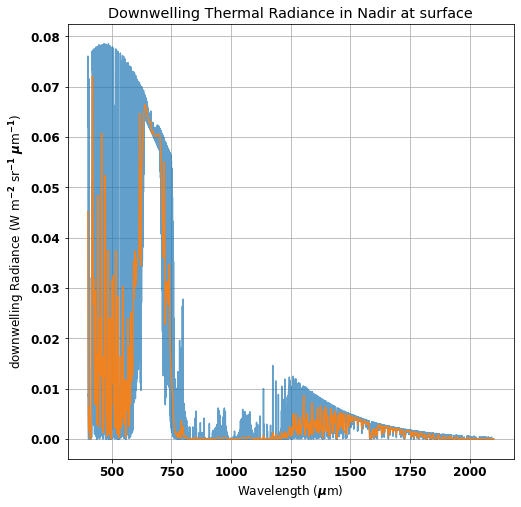

In [41]:
plt.figure(figsize = (8,8))
plt.plot(nu_,Surface_Down,label='downwelling radiance at surface', alpha=0.7)
plt.plot(nu_,gaussian_filter1d(Surface_Down,100),label='downwelling radiance at surface', alpha=0.9)
# plt.plot(wl_nu*1e6,gaussian_filter1d(Surface_Down_dH2O,200),label='downwelling radiance at surface', alpha=0.9)
plt.grid()
plt.xlabel('Wavelength ($\mu$m)')
plt.ylabel('downwelling Radiance (W m$^{-2}$ sr$^{-1}$ $\mu$m$^{-1}$)')
# plt.xlim((4,30))
plt.title('Downwelling Thermal Radiance in Nadir at surface')

In [44]:
# plt.plot(T_local)
# plot_profile(p_prof, q_local, newfig_bool = False, xlabel= 'Specific Humidity')
# plt.ylim([p_full.max(), 10000])

(64865.88, 10000)

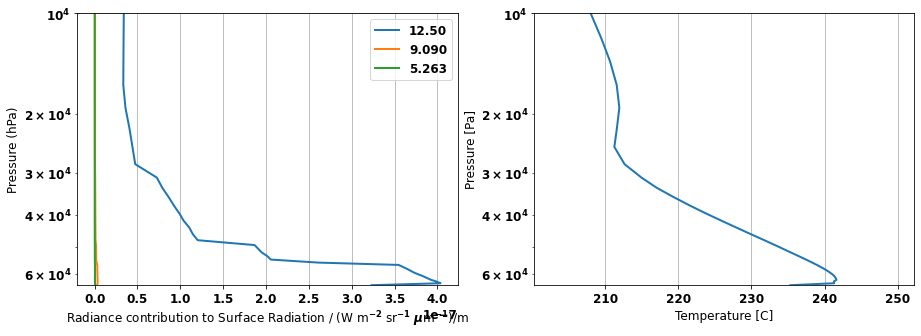

In [42]:
# fig, ax = plt.subplots(1,2)
i1, i2, i3 = 40000, 70000, 150000
plt.figure(figsize = (15,5))
plt.subplot(121)
plot_profile(p_prof, np.mean(Rdown[i1,:],axis=0)/dz_prof, newfig_bool = False, label = str(wl_nu[i1]*1e6)[:5])
plot_profile(p_prof, np.mean(Rdown[i2,:],axis=0)/dz_prof, newfig_bool = False, label = str(wl_nu[i2]*1e6)[:5])
rr = plot_profile(p_prof, np.mean(Rdown[i3,:],axis=0)/dz_prof, newfig_bool = False, label = str(wl_nu[i3]*1e6)[:5])

plt.xlabel('Radiance contribution to Surface Radiation / (W m$^{-2}$ sr$^{-1}$ $\mu$m$^{-1}$)/m')
plt.ylabel('Pressure (hPa)')
plt.ylim([p_prof.max(), 10000])
plt.legend()


plt.subplot(122)
plot_profile(p_prof, T_prof, newfig_bool = False)
# plot_profile(p_full, q_local, newfig_bool = False)
plt.ylim([p_prof.max(), 10000])

## Make pdf of downwelling radiation

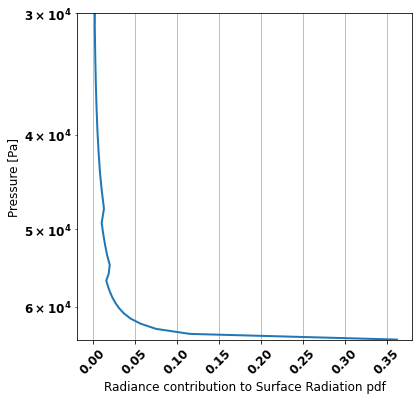

In [43]:
# plt.plot(Rdown[100000,:])
Rdown_pdf =  Rdown.sum(axis =0)
Rdown_pdf = Rdown_pdf/Rdown_pdf.sum()
plot_profile(p_prof, Rdown_pdf, min_pres = 3e4, 
             xlabel = 'Radiance contribution to Surface Radiation pdf',
             rotation = 45)

In [49]:
# plt.plot(Rdown[10,:][::-1]/dz_prof[::-1], np.cumsum(tau_co2[10,:][::-1]),label='AMSU-4')

# plt.legend(loc=0)
# # plt.ylim((10,0))
# plt.xlabel('Radiance contribution to TOA / (W m$^{-2}$ sr$^{-1}$ $\mu$m$^{-1}$)/m')
# plt.ylabel(r'$\tau$')

In [24]:
# tau matrix calculation (old)
tau_matrix = tau_co2[:,::-1].copy()
# tau_matrix = tau_co2_pre[:,::-1].copy()
# tau_matrix = tau_ch4[:,::-1].copy()
# tau_matrix = tau_h2o[:,::-1].copy()

# T_matrix = T[:,::-1]
# dT = np.diff(T_matrix, axis = 1)

tau_tolerance = 0.03
N_ks = tau_matrix .shape[0]
tau_matrix_cumsum = np.cumsum(tau_matrix, axis = 1)
# tau_wl = np.zeros((N_ks,1))
# dT_dz = np.zeros((N_ks,1))
tau_wl = np.zeros((N_ks,))
dT_dz = np.zeros((N_ks,))
for k_i in range(N_ks):
    tau_cumsum_z = tau_matrix_cumsum[k_i,:]
    tau_1_index = np.where((tau_cumsum_z - 1) > tau_tolerance)[0]
    if tau_1_index.size == 0:
        tau_wl[k_i] = np.nan
        dT_dz[k_i] = np.nan
        
    else:
        if len(tau_1_index) > 1:
            tau_1_index = tau_1_index[0]
        tau_wl[k_i] = p_prof[::-1][tau_1_index]
        # compute derivatives correctly 
#         dT_dz[k_i] = (T_prof[::-1][tau_1_index] - T_prof[::-1][tau_1_index + 1])/dz_prof[::-1][tau_1_index]
        # derivative with spline object
        dT_dz[k_i]  = interp_prof[-1](tau_wl[k_i],1)
#         break

NameError: name 'interp_prof' is not defined

In [50]:
## 
interp_prof = interpolate_profile(p_prof, 
                    T_prof,
                    p_interp_grid = np.linspace(1e3, p_prof.max(), 300),
                    return_interp_obj=True)

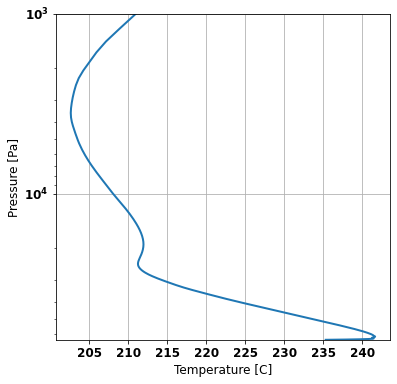

In [51]:
plot_profile(interp_prof[0], interp_prof[1], min_pres = 1e3)

In [44]:
def interpolate_profile(p_prof, 
                        var_prof, 
                        p_interp_grid, 
                        method = 'CubicSpline',
                        return_interp_obj = False):
    '''
    Interpolate profile to given pressure grid. 
    
    Args
    -----
    p_prof - np.array
        pressure profile 
    var_prof - np.array
        profile of variable to interpolate
    method - str {'CubicSpline','Linear'}
        interpolation method to use
        
    return_interp_obj - bool
        if True, return scipy.interpolate object along with profile
        
        
    Returns
    -------
    (p_interp_grid, var_prof_interpolated) - Profile interpolated to p_interp_grid
    
    '''
    # ensure coords are increasing 
    reversed_coords = False
    if (p_prof[1] < p_prof[0]) & \
       (var_prof[1] < var_prof[0]):
#        (p_interp_grid[1] < p_interp_grid[0]):
#         print('here')
        p_prof = p_prof[::-1]
        var_prof = var_prof[::-1]
        reversed_coords = True
        
#     return (p_prof, var_prof)
    if method == 'CubicSpline':
        interp_obj = CubicSpline(p_prof,var_prof)
        var_prof_interpolated = interp_obj(p_interp_grid)
    
    if method == 'Linear':
        interp_obj = interp1d(p_prof,var_prof, bounds_error = False)
        var_prof_interpolated = interp_obj(p_interp_grid)
        
#     if reversed_coords: 
#         var_prof_interpolated = var_prof_interpolated[::-1]
    if return_interp_obj:
        return (p_interp_grid, var_prof_interpolated, interp_obj)
    else:
        return (p_interp_grid, var_prof_interpolated)

In [45]:
# interpolate T vs. pressure (to find dT/dz @ tau = 1)
z_prof = np.cumsum(dz_prof[::-1])
interp_prof = interpolate_profile(z_prof, 
                    T_prof,
                    p_interp_grid = np.linspace(z_prof.min(), z_prof.max(), 1000),
                    return_interp_obj=True)

In [46]:
%%time
# tau matrix calculation (new)
tau_matrix = tau_co2[:,::-1].copy()
# tau_matrix = tau_co2_pre[:,::-1].copy()
# tau_matrix = tau_ch4[:,::-1].copy()
# tau_matrix = tau_h2o[:,::-1].copy()

T_matrix = T[:,::-1]




N_ks = tau_matrix .shape[0]
tau_matrix_cumsum = np.cumsum(tau_matrix, axis = 1)

# cumsum_tau_2dinterp_obj = interp2d(z_prof, nu_, tau_matrix_cumsum)

tau_wl = np.zeros((N_ks,))
dT_dz = np.zeros((N_ks,))
# p_interp_grid_tau = np.linspace(1e3, p_prof.max(), 500)
# cumsum(tau) grid to interp to
p_interp_grid_tau = np.linspace(0, 5, 1000)
for k_i in range(N_ks):
    tau_cumsum_z = tau_matrix_cumsum[k_i,:]
    # interpolate cumsum(tau) vs. pressure (to find tau = 1)
    interp_tau_cumsum = interpolate_profile(tau_cumsum_z,
                    z_prof[::-1], 
                    method = 'Linear',
                    p_interp_grid = p_interp_grid_tau,
                    return_interp_obj=True)
    
    
    z_at_tau_1 = interp_tau_cumsum[-1](1.0)
    # interp to pressure where tau = 1
    tau_wl[k_i] = interp_tau_cumsum[-1](1.0)
#     tau_wl[k_i] = cumsum_tau_2dinterp_obj(z_at_tau_1, nu_[k_i])
        
    dT_dz[k_i]  = interp_prof[-1](tau_wl[k_i], nu = 1)


/home/cchristo/anaconda3/envs/rad_transfer/lib/python3.6/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/home/cchristo/anaconda3/envs/rad_transfer/lib/python3.6/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


CPU times: user 56.2 s, sys: 197 ms, total: 56.4 s
Wall time: 56.4 s


In [226]:
%%time
# interp_prof[0].max()
# plot_profile(p_prof, T_prof)
# nu_mesh, z_prof_mesh = np.meshgrid(nu_, z_prof)
# cumsum_tau_2dinterp_obj = interp2d(z_prof, nu_, tau_matrix_cumsum)

# nu_
# tau_matrix_cumsum.shape

CPU times: user 9 µs, sys: 2 µs, total: 11 µs
Wall time: 23.8 µs


In [216]:
tau_matrix_cumsum.shape

(170000, 72)

In [228]:
nu_

array([ 400.  ,  400.01,  400.02, ..., 2099.97, 2099.98, 2099.99])

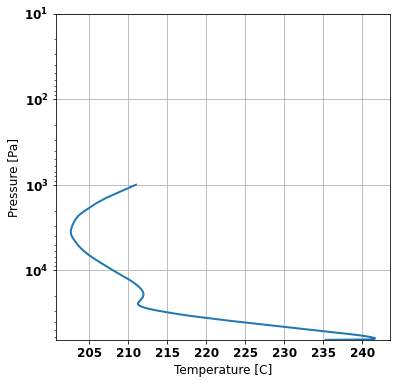

In [52]:
# interp_tau_cumsum
# plot_profile(p_prof[::-1], tau_cumsum_z)
plot_profile(interp_prof[0], interp_prof[1])
# plot_profile(interp_tau_cumsum[0], interp_tau_cumsum[1])

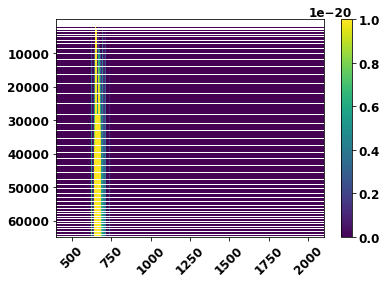

In [86]:

plt.pcolormesh(nu_, p_prof , cs_matrix_co2.T, vmax = 10**-20)
plt.gca().invert_yaxis()
# plt.gca().set_aspect(1/0.0005)
# plt.xlim([650, 700])÷
plt.xticks(rotation = 45)
plt.colorbar()

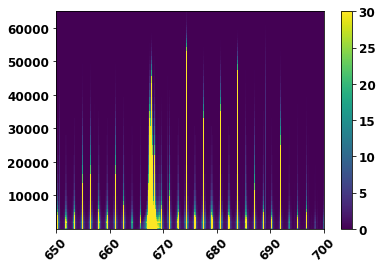

In [74]:
# interp_tau_cumsum
# p_prof
plt.pcolormesh(nu_, p_prof , tau_matrix.T, vmax = 30)
# plt.gca().set_aspect(1/0.0005)
plt.xlim([650, 700])
plt.xticks(rotation = 45)
plt.colorbar()

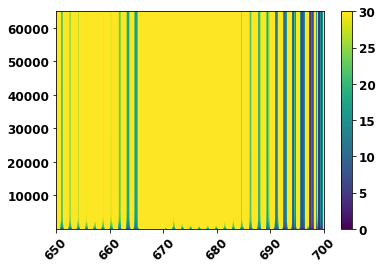

In [63]:
# interp_tau_cumsum[-1]
# plt.imshow(tau_matrix_cumsum.T, vmax = 2, origin = 'lower')
plt.pcolormesh(nu_, p_prof , tau_matrix_cumsum.T , vmax = 30)
# plt.gca().set_aspect(1/0.0005)
plt.xlim([650, 700])
plt.xticks(rotation = 45)
plt.colorbar()

In [58]:
# tau_wl_co2_400 = tau_wl.copy()
# tau_wl_co2_270 = tau_wl.copy()

In [59]:
# tau_wl
# ignore_inds = 0
# ave_emis_pres  = np.nansum((Surface_Down[ignore_inds:] *
#                             tau_wl_co2_400[ignore_inds:])/np.sum(Surface_Down[ignore_inds:]))

In [60]:
# np.nanmean(tau_wl_co2_400)
# plt.plot(wl_nm, Surface_Down)
# plt.xlim([5,30])


In [61]:
# %run simulate_radiances_utils.py
# time_i

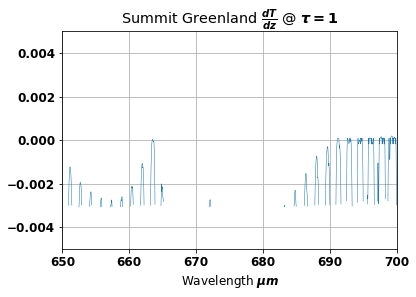

In [54]:
# plt.figure(figsize = (8,8))

plt.title(r'Summit Greenland $\frac{dT}{dz}$ @ $\tau = 1$')
plt.xlabel(r'Wavelength $\mu m$')
plt.plot(nu_, dT_dz, linewidth = 0.5)
# plt.xlim((12,18))
# plt.xlim([550, 850])
plt.xlim([650, 700])
plt.ylim([-0.005, 0.005])
plt.grid()
# plt.savefig(save_figs_rel_dir + 'emission_height_plots/summit_greenland_dT_dz_7_1_22_30.png', dpi = 300)


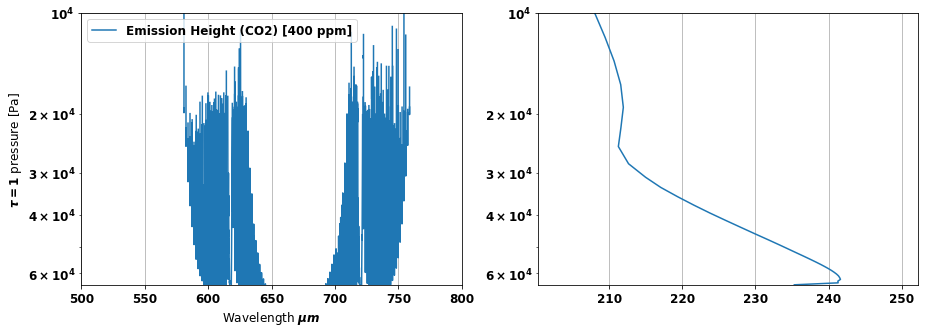

In [55]:
wl_nm = wl_nu*1e6
plot_emission_height(nu_, tau_wl, T_prof, p_prof,
                     label = 'Emission Height (CO2) [400 ppm]',
                     xlim = [500,800], ylim = [p_prof.max(), 10**4])
#                     xlim = [wl_nm.min(), wl_nm.max()]
#                     ave_emmission_pres = np.nanmean(tau_wl_co2_400))
# plt.xlim((12,18))
# plt.savefig(save_figs_rel_dir + 'emission_height_plots/summit_greenland_emission_height_v_k_7_1_22_30.png', dpi = 300)

In [64]:
plt.plot(np.mean(Rdown, axis = 0))

NameError: name 'plt' is not defined

In [65]:
3e4

30000.0

In [66]:
# Surface_Down,tau_wl_co2_400

In [67]:
plot_emission_height(wl_nm, tau_wl, T_prof, p_prof, 
                     ylim = [p_prof.max(), 10**4],
                     label = 'Emission Height (CO2) [270 ppm]')

NameError: name 'plot_emission_height' is not defined

In [68]:
plt.title('Change in CO2 emission height')
plt.xlabel(r'Wavelength $\mu m$')
plt.plot(wl_nu*1e6, tau_wl_co2_400 - tau_wl_co2_270, linewidth = 0.5)
plt.xlim((12.5,17.6))
plt.ylim([0, 15000])
plt.grid()

NameError: name 'plt' is not defined

In [69]:
plot_emission_height(wl_nm, tau_wl, T_prof, p_prof,
                     ylim = [p_prof.max(), 10**3.5],
                     label = 'Emission Height (CH4)')

NameError: name 'plot_emission_height' is not defined

In [70]:
plot_emission_height(wl_nm, tau_wl, T_prof, p_prof,
                     ylim = [p_prof.max(), 10**3.5],
                     label = 'Emission Height (H20)')

NameError: name 'plot_emission_height' is not defined